## Imports

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
!ls '/content/gdrive/MyDrive/Datasets'

Mounted at /content/gdrive
Dataset_bsl


##0 Imports

In [ ]:
import os
import pathlib
import glob
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

##2 Take Data

In [ ]:
!pip install memory-profiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
x_images = np.load('/content/gdrive/MyDrive/Datasets/Dataset_bsl/RESIZED_DATASET/train_img_normalized.npy')
y_labels = np.load('/content/gdrive/MyDrive/Datasets/Dataset_bsl/RESIZED_DATASET/train_label_normalized.npy')

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(
    x_images, y_labels, test_size=0.1, random_state=42)

# Print the shapes of the train and test sets
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

del x_images
del y_labels

Train images shape: (69683, 64, 64, 3)
Train labels shape: (69683,)
Test images shape: (7743, 64, 64, 3)
Test labels shape: (7743,)


In [ ]:
val_images = np.load('/content/gdrive/MyDrive/Datasets/Dataset_bsl/RESIZED_TESTING_DATA/test_img_normalized.npy')
val_labels = np.load('/content/gdrive/MyDrive/Datasets/Dataset_bsl/RESIZED_TESTING_DATA/test_label_normalized.npy')

# Data Visualize

## Train Images

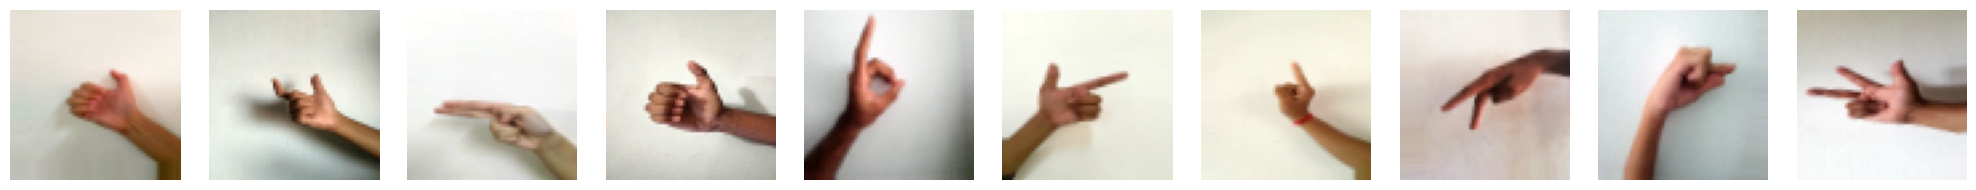

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the numpy file containing the 1000 photos

# Choose 10 random indices for the photos
random_indices = np.random.choice(train_images.shape[0], size=10, replace=False)

# Create a figure to display the photos horizontally
fig = plt.figure(figsize=(20, 2))
for i, index in enumerate(random_indices):
    ax = fig.add_subplot(1, 10, i+1)
    train_images[index] = cv2.cvtColor(train_images[index], cv2.COLOR_BGR2RGB)
    ax.imshow(train_images[index])
    ax.axis('off')

# Adjust the spacing between subplots
fig.tight_layout()

# Display the figure
plt.show()

## Test Images

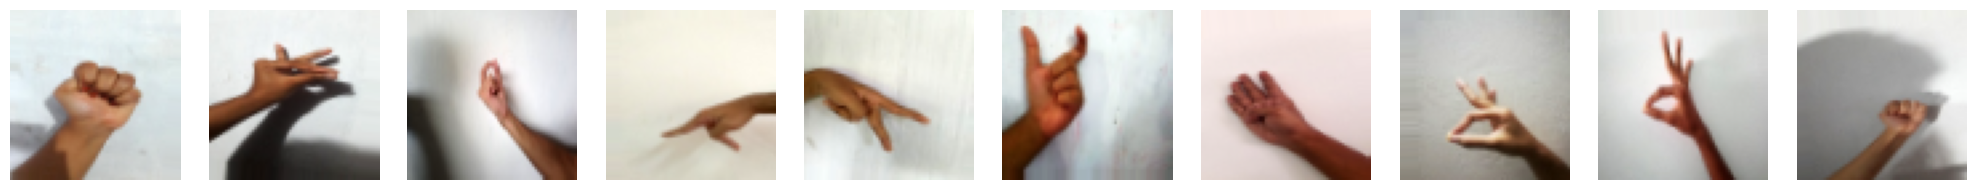

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the numpy file containing the 1000 photos

# Choose 10 random indices for the photos
random_indices = np.random.choice(test_images.shape[0], size=10, replace=False)

# Create a figure to display the photos horizontally
fig = plt.figure(figsize=(20, 2))
for i, index in enumerate(random_indices):
    ax = fig.add_subplot(1, 10, i+1)
    test_images[index] = cv2.cvtColor(test_images[index], cv2.COLOR_BGR2RGB)
    ax.imshow(test_images[index])
    ax.axis('off')

# Adjust the spacing between subplots
fig.tight_layout()

# Display the figure
plt.show()

## Validation

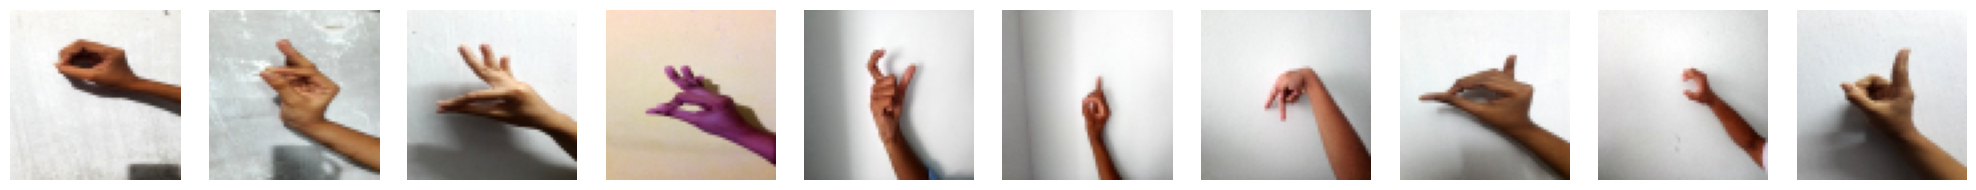

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the numpy file containing the 1000 photos

# Choose 10 random indices for the photos
random_indices = np.random.choice(val_images.shape[0], size=10, replace=False)

# Create a figure to display the photos horizontally
fig = plt.figure(figsize=(20, 2))
for i, index in enumerate(random_indices):
    ax = fig.add_subplot(1, 10, i+1)
    val_images[index] = cv2.cvtColor(val_images[index], cv2.COLOR_BGR2RGB)
    ax.imshow(val_images[index])
    ax.axis('off')

# Adjust the spacing between subplots
fig.tight_layout()

# Display the figure
plt.show()

## Distribution vizualization

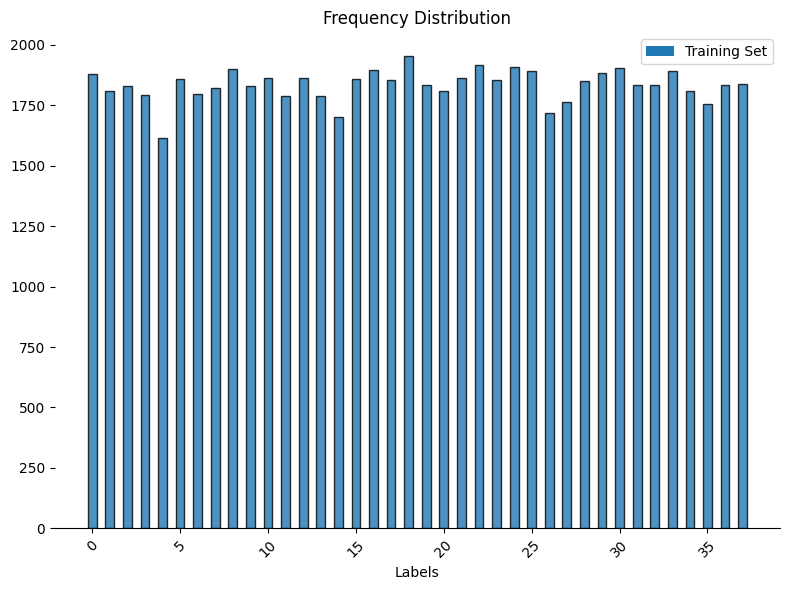

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the numpy files
labels = train_labels

# Calculate the unique labels and their frequencies
unique_labels, label_counts = np.unique(labels, return_counts=True)

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Customize the bar chart
bar_color = '#1f77b4' # Red color for the bars
bar_width = 0.5  # Width of the bars
bar_alpha = 0.8  # Transparency of the bars
bar_edgecolor = 'black'  # Edge color of the bars

# Create the bar plot
bar_plot = ax.bar(unique_labels, label_counts, width=bar_width, color=bar_color, alpha=bar_alpha, edgecolor=bar_edgecolor)

# Set labels and title
ax.set_xlabel('Labels')
ax.set_title('Frequency Distribution')

# Customize ticks and gridlines
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='')

# Remove margins
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add a custom legend for the color
custom_legend = [plt.Rectangle((0, 0), 1, 1, fc=bar_color)]
legend_labels = ['Training Set']

# Display the legend
ax.legend(custom_legend, legend_labels)

# Adjust spacing
fig.tight_layout()

# Show the customized bar chart
plt.show()

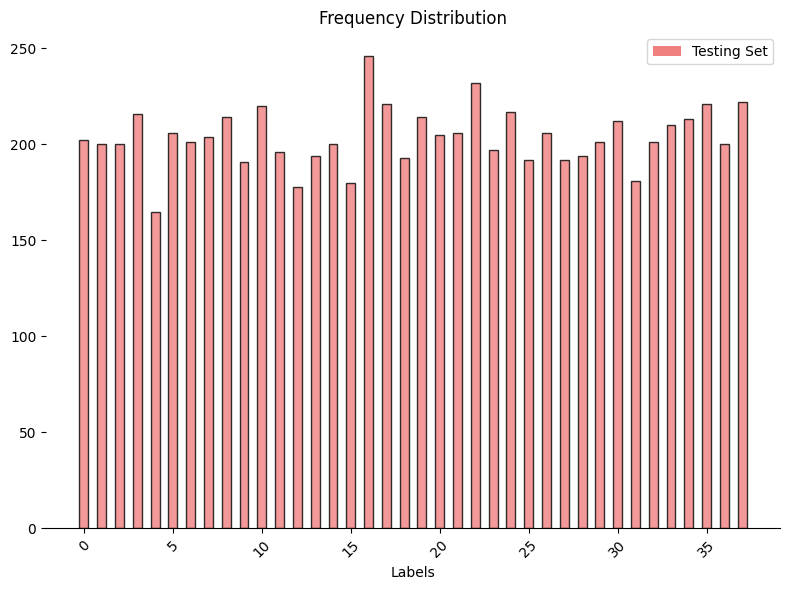

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the numpy files
labels = test_labels

# Calculate the unique labels and their frequencies
unique_labels, label_counts = np.unique(labels, return_counts=True)

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Customize the bar chart
bar_color = 'lightcoral' # Red color for the bars
bar_width = 0.5  # Width of the bars
bar_alpha = 0.8  # Transparency of the bars
bar_edgecolor = 'black'  # Edge color of the bars

# Create the bar plot
bar_plot = ax.bar(unique_labels, label_counts, width=bar_width, color=bar_color, alpha=bar_alpha, edgecolor=bar_edgecolor)

# Set labels and title
ax.set_xlabel('Labels')
ax.set_title('Frequency Distribution')

# Customize ticks and gridlines
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='')

# Remove margins
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add a custom legend for the color
custom_legend = [plt.Rectangle((0, 0), 1, 1, fc=bar_color)]
legend_labels = ['Testing Set']

# Display the legend
ax.legend(custom_legend, legend_labels)

# Adjust spacing
fig.tight_layout()

# Show the customized bar chart
plt.show()

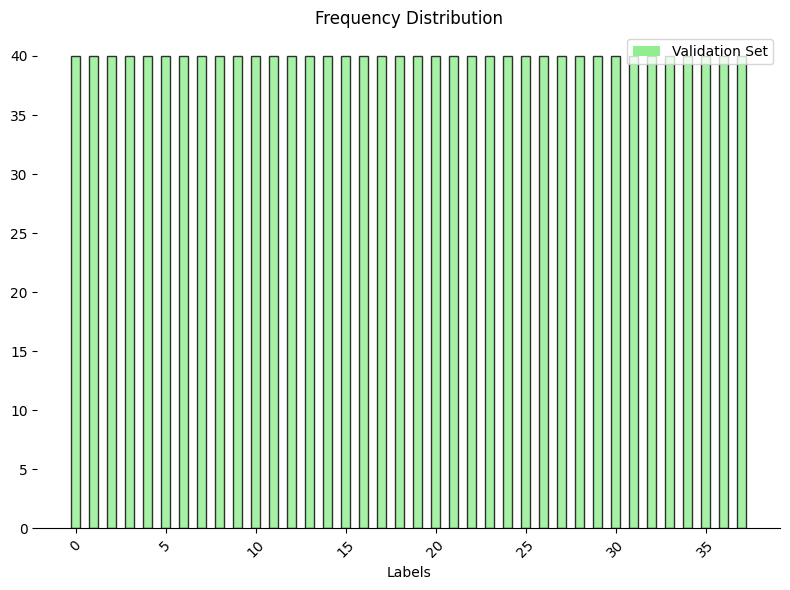

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the numpy files
labels = val_labels

# Calculate the unique labels and their frequencies
unique_labels, label_counts = np.unique(labels, return_counts=True)

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Customize the bar chart
bar_color = 'lightgreen' # Red color for the bars
bar_width = 0.5  # Width of the bars
bar_alpha = 0.8  # Transparency of the bars
bar_edgecolor = 'black'  # Edge color of the bars

# Create the bar plot
bar_plot = ax.bar(unique_labels, label_counts, width=bar_width, color=bar_color, alpha=bar_alpha, edgecolor=bar_edgecolor)

# Set labels and title
ax.set_xlabel('Labels')
ax.set_title('Frequency Distribution')

# Customize ticks and gridlines
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='')

# Remove margins
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add a custom legend for the color
custom_legend = [plt.Rectangle((0, 0), 1, 1, fc=bar_color)]
legend_labels = ['Validation Set']

# Display the legend
ax.legend(custom_legend, legend_labels)

# Adjust spacing
fig.tight_layout()

# Show the customized bar chart
plt.show()

## 4 Custom model

In [ ]:
image_height, image_width, num_channels = train_images.shape[1:]

num_classes = 38

from keras.utils import to_categorical
train_labels_one_hot = to_categorical(train_labels, num_classes)




In [ ]:
from keras.utils import to_categorical
num_classes = 38
test_labels_one_hot = to_categorical(test_labels, num_classes)

In [ ]:
from keras.utils import to_categorical
num_classes = 38
val_labels_one_hot = to_categorical(val_labels, num_classes)

In [ ]:
import tensorflow as tf

tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='min',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=8
)

#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(verbose=1,min_lr=0.00000001, patience=7,),
    tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
]

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout


# Define the model architecture
model = tf.keras.Sequential([
    # Input layer
    layers.Input(shape=(image_height, image_width, num_channels)),

    # Convolutional layers
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', strides=1),
    layers.BatchNormalization(),

    layers.Conv2D(filters=48, kernel_size=(3, 3), activation='relu', padding = 'same', strides=1),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same', strides=1),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same', strides=1),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same', strides=1),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    layers.BatchNormalization(),


    layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    #layers.Dropout(0.5),

    # Flatten layer
    layers.Flatten(),

    # Dense layers
    layers.Dense(units=256, activation='relu'),
    # layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(units=num_classes, activation='softmax')
])


#lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-2, decay_steps=10000, decay_rate=0.9)
#optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
mode_history = model.fit(train_images, train_labels_one_hot, epochs=70, batch_size=200, validation_data=(test_images, test_labels_one_hot), callbacks=[callbacks])

Epoch 1/70
349/349 [==============================] - 45s 108ms/step - loss: 2.1522 - accuracy: 0.4026 - val_loss: 4.6565 - val_accuracy: 0.0267 - lr: 0.0010
Epoch 2/70
349/349 [==============================] - 35s 101ms/step - loss: 0.7693 - accuracy: 0.7605 - val_loss: 0.6057 - val_accuracy: 0.8040 - lr: 0.0010
Epoch 3/70
349/349 [==============================] - 35s 101ms/step - loss: 0.5052 - accuracy: 0.8413 - val_loss: 0.9913 - val_accuracy: 0.7135 - lr: 0.0010
Epoch 4/70
349/349 [==============================] - 35s 101ms/step - loss: 0.3933 - accuracy: 0.8747 - val_loss: 0.3713 - val_accuracy: 0.8812 - lr: 0.0010
Epoch 5/70
349/349 [==============================] - 35s 99ms/step - loss: 0.3195 - accuracy: 0.8972 - val_loss: 0.3144 - val_accuracy: 0.8998 - lr: 0.0010
Epoch 6/70
349/349 [==============================] - 35s 100ms/step - loss: 0.2630 - accuracy: 0.9139 - val_loss: 0.3125 - val_accuracy: 0.9079 - lr: 0.0010
Epoch 7/70
349/349 [==============================] -

In [ ]:
print(train_labels.shape)
print(train_images.shape)

(69683,)
(69683, 64, 64, 3)


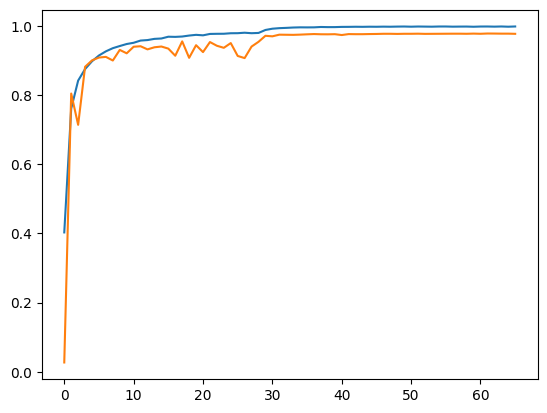

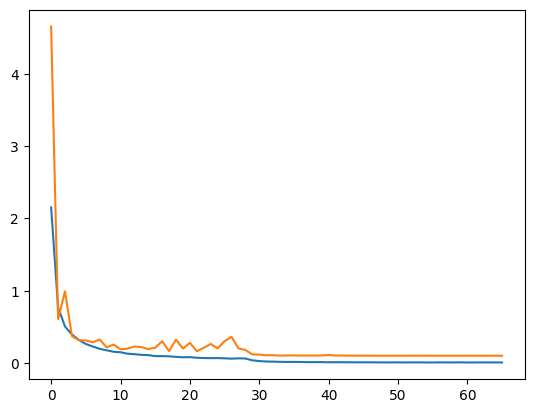

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(mode_history.history["accuracy"])
plt.plot(mode_history.history["val_accuracy"])
plt.figure()
plt.plot(mode_history.history["loss"])
plt.plot(mode_history.history["val_loss"])

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def plot_model_training_curve(history):
    fig = make_subplots(rows=1, cols=2, subplot_titles=['Model Accuracy', 'Model Loss'])
    fig.add_trace(
        go.Scatter(
            y=history.history['accuracy'],
            name='train_acc'),
        row=1, col=1)
    fig.add_trace(
        go.Scatter(
            y=history.history['val_accuracy'],
            name='val_acc'),
        row=1, col=1)
    fig.add_trace(
        go.Scatter(
            y=history.history['loss'],
            name='train_loss'),
        row=1, col=2)
    fig.add_trace(
        go.Scatter(
            y=history.history['val_loss'],
            name='val_loss'),
        row=1, col=2)
    fig.show()

In [ ]:
plot_model_training_curve(mode_history)

#eval and save


In [ ]:
model_evaluation_history = model.evaluate(val_images, val_labels_one_hot)

model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history

48/48 [==============================] - 0s 7ms/step - loss: 0.4193 - accuracy: 0.9289


In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 20.1 MB/s eta 0:00:00


In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt
from tensorflow.keras import layers

color_map = defaultdict(dict)
color_palette = ['lightblue', 'lightcoral', 'lightgreen', 'lightgray', 'lightsalmon']

color_map[layers.Conv2D]['fill'] = color_palette[0]
color_map[layers.MaxPooling2D]['fill'] = color_palette[1]
color_map[layers.Dense]['fill'] = color_palette[2]
color_map[layers.Flatten]['fill'] = color_palette[3]
color_map[layers.BatchNormalization]['fill'] = color_palette[4]


In [ ]:
from PIL import ImageFont

import visualkeras
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 48)        13872     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 48)       0         
 2D)                                                             
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 48)       192       
 hNormalization)                                                 
                                                      

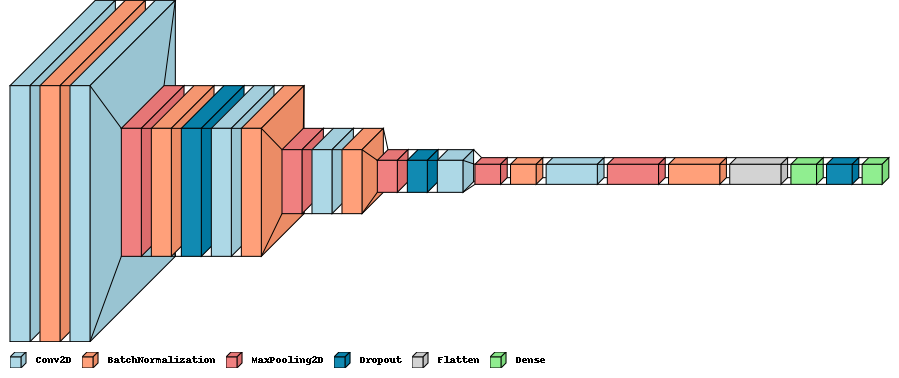

In [ ]:
visualkeras.layered_view(model, legend=True,color_map=color_map)

In [ ]:
#Khan.abrar.shams@g.bracu.ac.bd
model.save('/content/gdrive/MyDrive/pre2_models/10normalized_dataset_bestfit.h5')

# Report Training

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions using the loaded model
predictions = model.predict(train_images)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded test labels back to categorical labels
true_labels = np.argmax(train_labels_one_hot, axis=1)

# Calculate precision, recall, and F1 score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

2178/2178 [==============================] - 19s 5ms/step
Precision: 0.9999856571437346
Recall: 0.9999856492975331
F1 Score: 0.9999856493507742


# Report Testing

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/gdrive/MyDrive/pre2_models/10normalized_dataset_bestfit.h5')

In [ ]:
from sklearn.metrics import confusion_matrix
# Make predictions on the test set
y_pred = np.argmax(model.predict(test_images), axis=1)
y_true = np.argmax(test_labels_one_hot, axis=1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

242/242 [==============================] - 8s 22ms/step
Confusion Matrix:
[[196   2   0 ...   0   0   0]
 [  0 197   0 ...   0   0   0]
 [  0   0 198 ...   0   0   0]
 ...
 [  0   0   0 ... 212   0   0]
 [  0   0   0 ...   0 197   0]
 [  0   0   0 ...   0   0 222]]


242/242 [==============================] - 3s 13ms/step


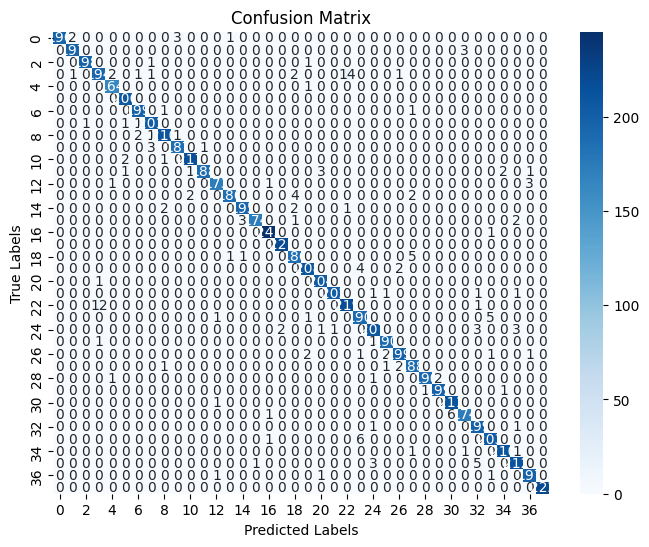

In [ ]:
y_pred = np.argmax(model.predict(test_images), axis=1)
y_true = np.argmax(test_labels_one_hot, axis=1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Make predictions on the test set
y_pred = np.argmax(model.predict(test_images), axis=1)
y_true = np.argmax(test_labels_one_hot, axis=1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)


242/242 [==============================] - 3s 12ms/step
Confusion Matrix:
[[196   2   0 ...   0   0   0]
 [  0 197   0 ...   0   0   0]
 [  0   0 198 ...   0   0   0]
 ...
 [  0   0   0 ... 212   0   0]
 [  0   0   0 ...   0 197   0]
 [  0   0   0 ...   0   0 222]]


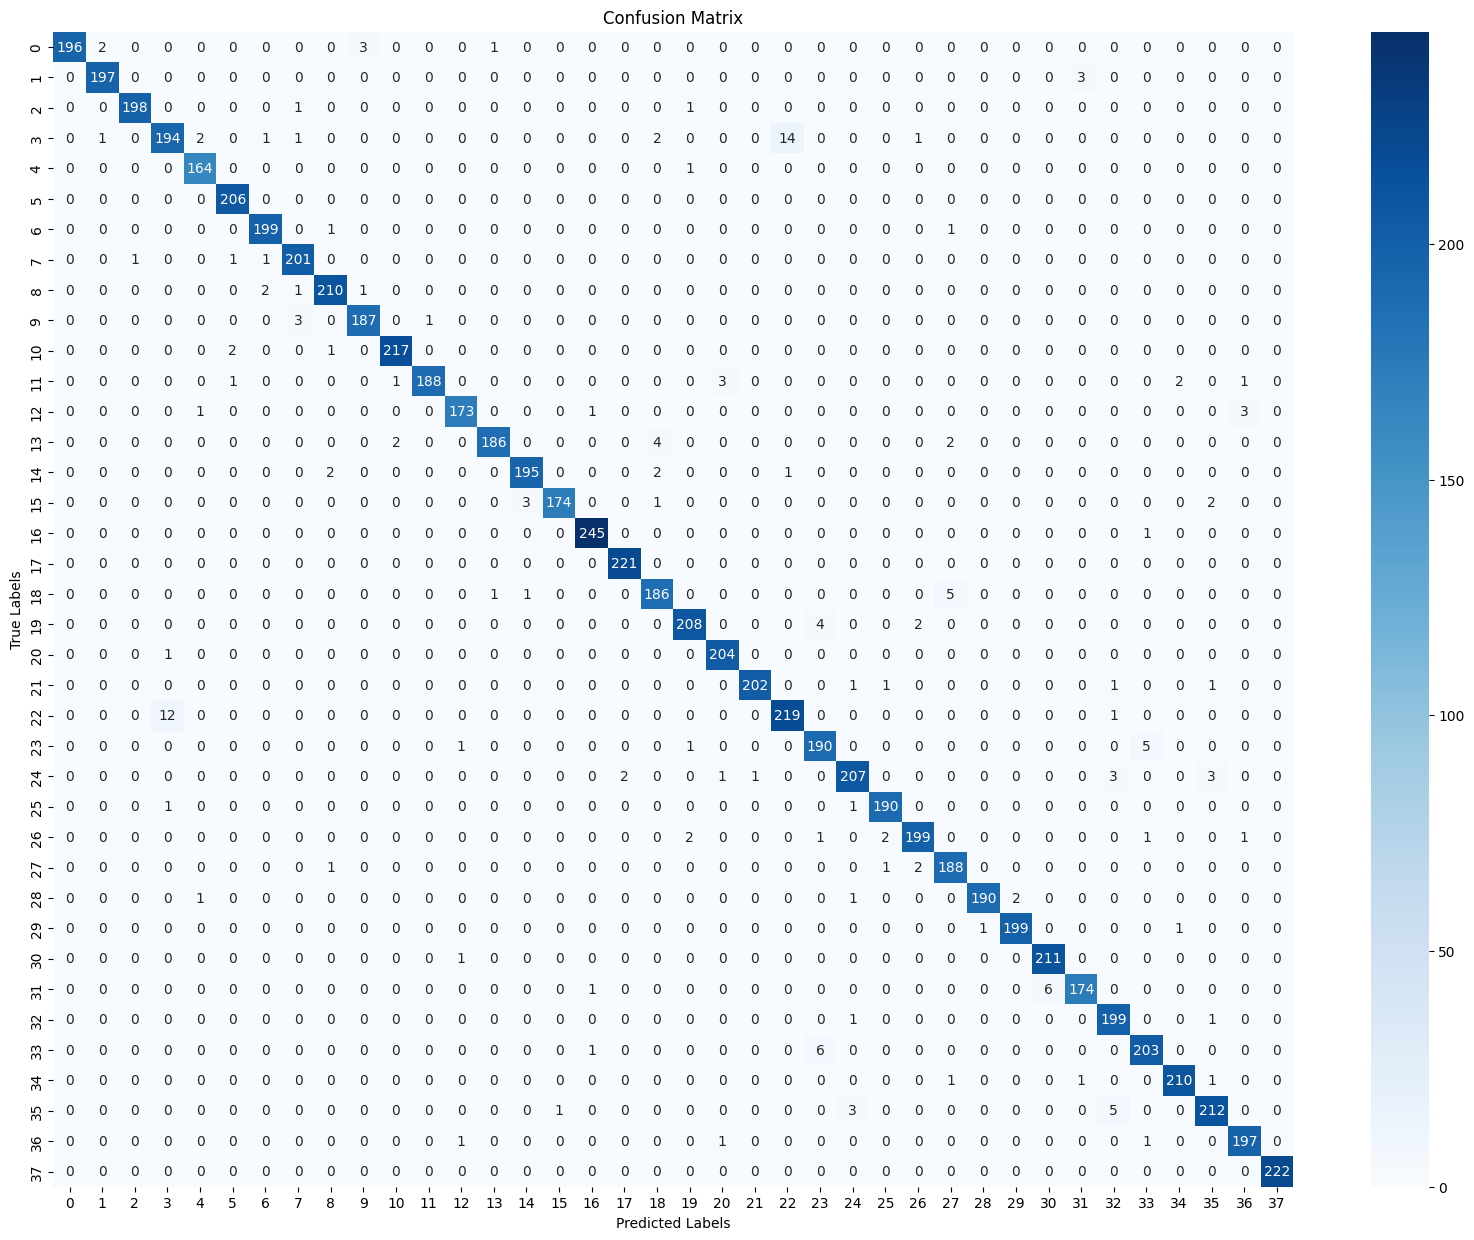

In [ ]:

# Plot the confusion matrix
plt.figure(figsize=(20, 15))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions using the loaded model
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded test labels back to categorical labels
true_labels = np.argmax(test_labels_one_hot, axis=1)

# Calculate precision, recall, and F1 score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

242/242 [==============================] - 1s 5ms/step
Precision: 0.976587961353066
Recall: 0.9764948986181067
F1 Score: 0.976467967946306


# Report Validation

In [ ]:
from sklearn.metrics import confusion_matrix
# Make predictions on the test set
y_pred = np.argmax(model.predict(val_images), axis=1)
y_true = np.argmax(val_labels_one_hot, axis=1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

48/48 [==============================] - 7s 8ms/step
Confusion Matrix:
[[38  1  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  0]
 [ 0  0 39 ...  0  0  0]
 ...
 [ 0  0  0 ... 35  0  0]
 [ 0  0  0 ...  0 37  0]
 [ 0  0  0 ...  0  0 40]]


48/48 [==============================] - 0s 8ms/step


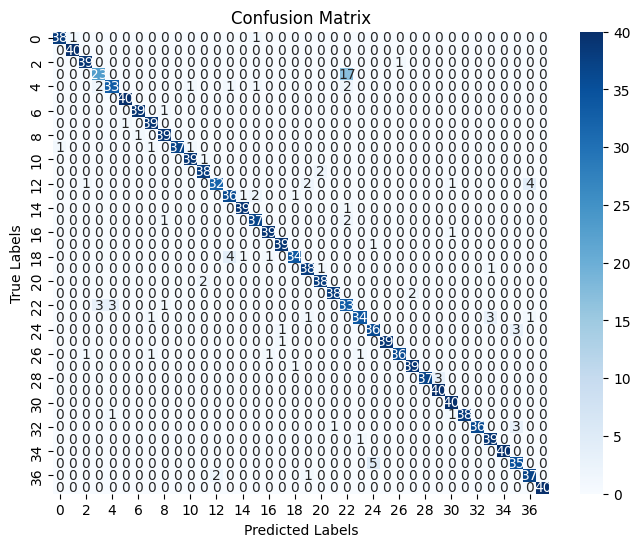

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = np.argmax(model.predict(val_images), axis=1)
y_true = np.argmax(val_labels_one_hot, axis=1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Make predictions on the test set
y_pred = np.argmax(model.predict(val_images), axis=1)
y_true = np.argmax(val_labels_one_hot, axis=1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)


48/48 [==============================] - 0s 6ms/step
Confusion Matrix:
[[36  3  0 ...  0  0  0]
 [ 1 38  0 ...  0  0  0]
 [ 0  0 38 ...  0  0  0]
 ...
 [ 0  0  0 ... 37  0  0]
 [ 0  0  0 ...  0 38  0]
 [ 0  0  0 ...  0  0 39]]


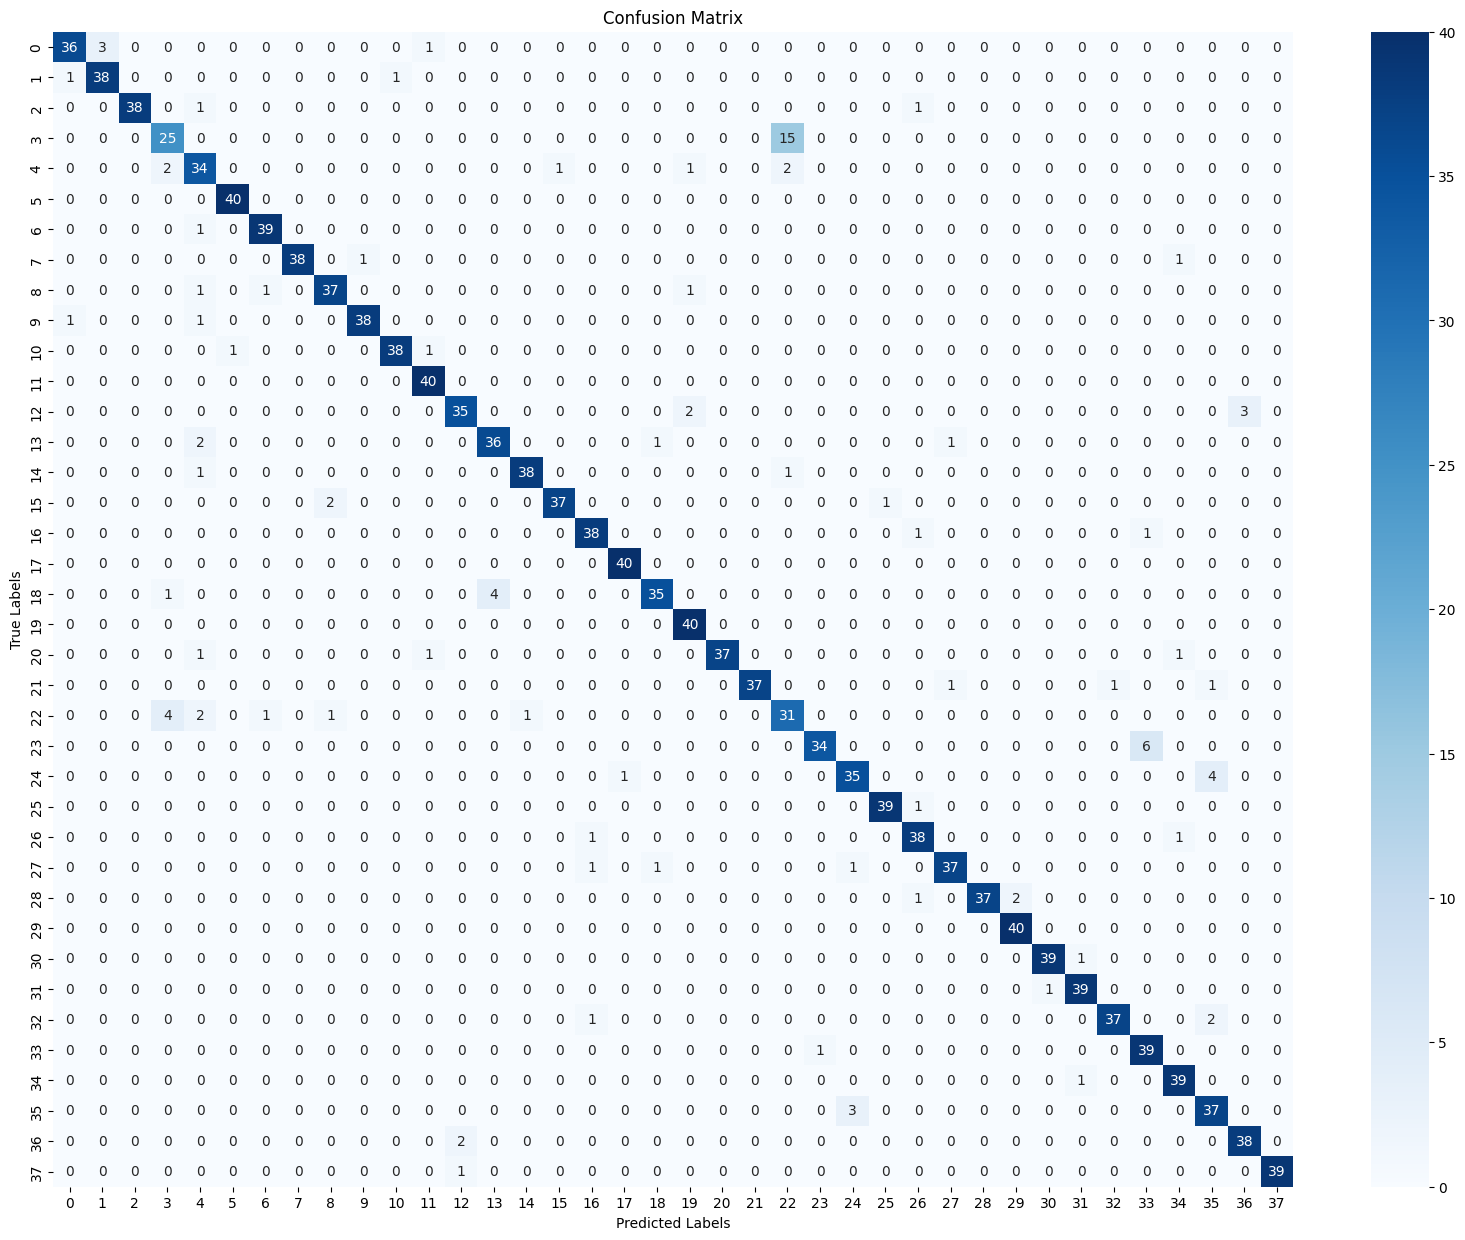

In [ ]:

# Plot the confusion matrix
plt.figure(figsize=(20, 15))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions using the loaded model
predictions = model.predict(val_images)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded test labels back to categorical labels
true_labels = np.argmax(val_labels_one_hot, axis=1)

# Calculate precision, recall, and F1 score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

48/48 [==============================] - 0s 6ms/step
Precision: 0.9318932728030267
Recall: 0.9289473684210526
F1 Score: 0.9292424879775169


In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model
model = load_model('/content/gdrive/MyDrive/pre2_models/normalized_dataset_bestfit.h5')

# Define class labels (replace with your own labels if needed)
class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37']
# Load and resize the input image
image = cv2.imread('/content/IMG_20230522_131234.jpg') #class
image = cv2.resize(image, (64, 64), interpolation=cv2.INTER_AREA)

# Preprocess the image
preprocessed_image = image/255.0

# Make predictions
predictions = model.predict(np.expand_dims(preprocessed_image, axis=0))

# Process the predictions
predicted_class = np.argmax(predictions)
predicted_label = class_labels[predicted_class]

# Print the predicted class/label
print("Predicted class:", predicted_class)

# Display the image with the predicted label
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("predicted label: "+ predicted_label)
plt.axis('off')
plt.show()


error: ignored

In [ ]:
!pip install lime

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 18ms/step


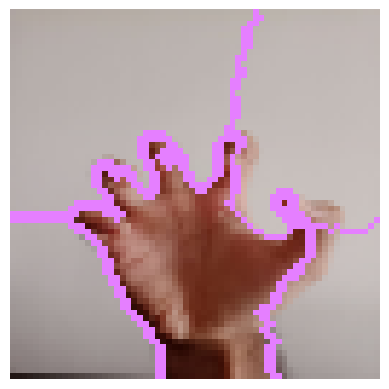

In [ ]:
import tensorflow as tf
import numpy as np
import skimage.io
import matplotlib.pyplot as plt
from lime import lime_image

# Load or train your deep learning model
model = tf.keras.models.load_model('/content/gdrive/MyDrive/pre2_models/normalized_dataset_bestfit.h5')

# Load the image you want to explain
image = skimage.io.imread('/content/IMG_20230522_131234.jpg')
image = image.astype(float) / 255.0  # Normalize pixel values
image = cv2.resize(image, (64, 64), interpolation=cv2.INTER_AREA)
# Define the function to preprocess the image and make predictions
def predict_fn(images):
    preprocessed_images = np.copy(images)
    # Apply any necessary preprocessing to the image
    predictions = model.predict(preprocessed_images)
    return predictions

# Create the LIME explainer
explainer = lime_image.LimeImageExplainer()

# Generate an explanation for the image
explanation = explainer.explain_instance(image, predict_fn, top_labels=1, hide_color=0, num_samples=1000)

segments = skimage.segmentation.mark_boundaries(image, explanation.segments, color=(.9, .5, 1))  # Set color to light red

# Visualize the superpixel segmentation
plt.imshow(segments)
plt.axis('off')
plt.show()


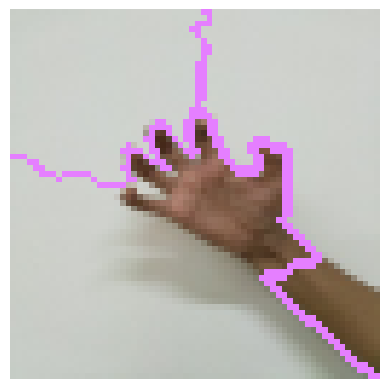

In [ ]:
# Get the superpixel segmentation of the image
segments = skimage.segmentation.mark_boundaries(image, explanation.segments, color=(.9, .5, 1))  # Set color to light red

# Visualize the superpixel segmentation
plt.imshow(segments)
plt.axis('off')
plt.show()


In [ ]:
import tensorflow as tf
import cv2

# Load the saved model
model = tf.keras.models.load_model('/content/gdrive/MyDrive/pre2_models/normalized_dataset_bestfit.h5')

# Create a list to store the feature maps
feature_maps = []

# Iterate through each layer in the model
for layer in model.layers:
    # Create a new model that outputs the feature maps from the current layer
    layer_feature_extractor = tf.keras.Model(inputs=model.input, outputs=layer.output)

    # Load and preprocess the input image
    image_path = '/content/Capture2.JPG'
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (64, 64))
    input_image = image[np.newaxis, ...]

    # Get the feature maps for the input image
    layer_feature_map = layer_feature_extractor.predict(input_image)

    # Add the feature maps to the list
    feature_maps.append(layer_feature_map)

# Print the shapes of the feature maps
for i, fmap in enumerate(feature_maps):
    print(f"Shape of feature maps from layer {i + 1}: {fmap.shape}")

1/1 [==============================] - 0s 142ms/step
Shape of feature maps from layer 1: (1, 64, 64, 32)
Shape of feature maps from layer 2: (1, 64, 64, 32)
Shape of feature maps from layer 3: (1, 64, 64, 48)
Shape of feature maps from layer 4: (1, 32, 32, 48)
Shape of feature maps from layer 5: (1, 32, 32, 48)
Shape of feature maps from layer 6: (1, 32, 32, 48)
Shape of feature maps from layer 7: (1, 32, 32, 64)
Shape of feature maps from layer 8: (1, 32, 32, 64)
Shape of feature maps from layer 9: (1, 16, 16, 64)
Shape of feature maps from layer 10: (1, 16, 16, 128)
Shape of feature maps from layer 11: (1, 16, 16, 128)
Shape of feature maps from layer 12: (1, 8, 8, 128)
Shape of feature maps from layer 13: (1, 8, 8, 128)
Shape of feature maps from layer 14: (1, 8, 8, 256)
Shape of feature maps from layer 15: (1, 4, 4, 256)
Shape of feature maps from layer 16: (1, 4, 4, 256)
Shape of feature maps from layer 17: (1, 2, 2, 512)
Shape of feature maps from layer 18: (1, 1, 1, 512)
Shape o

1/1 [==============================] - 0s 271ms/step
(1, 64, 64, 32)
(1, 64, 64, 48)
(1, 32, 32, 48)
(1, 32, 32, 48)
(1, 32, 32, 48)
(1, 32, 32, 64)
(1, 32, 32, 64)
(1, 16, 16, 64)
(1, 16, 16, 128)
(1, 16, 16, 128)
(1, 8, 8, 128)
(1, 8, 8, 128)
(1, 8, 8, 256)
(1, 4, 4, 256)
(1, 4, 4, 256)
(1, 2, 2, 512)
(1, 1, 1, 512)
(1, 1, 1, 512)
(1, 512)
(1, 256)
(1, 256)
(1, 38)


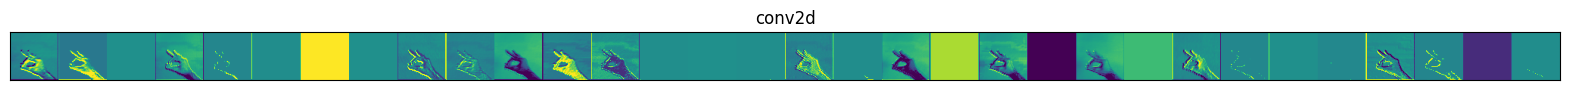

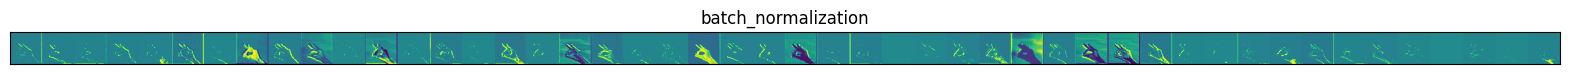

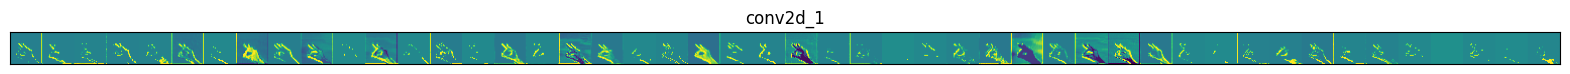

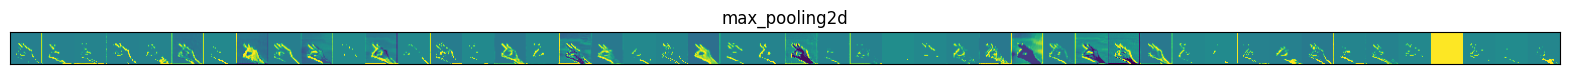

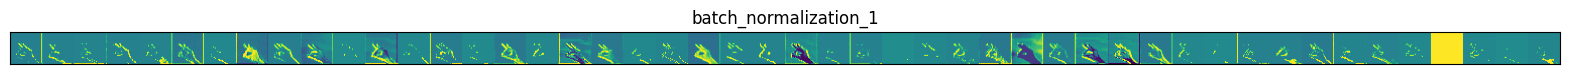

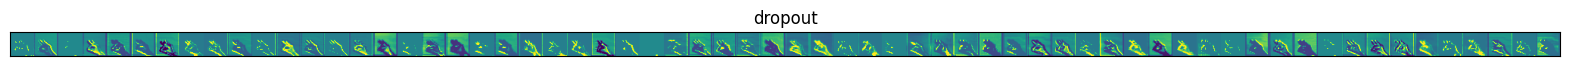

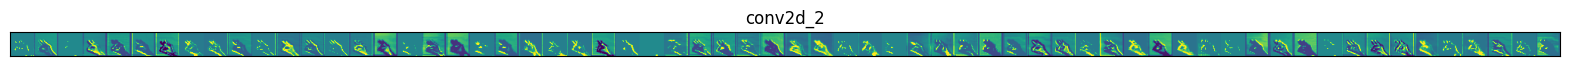

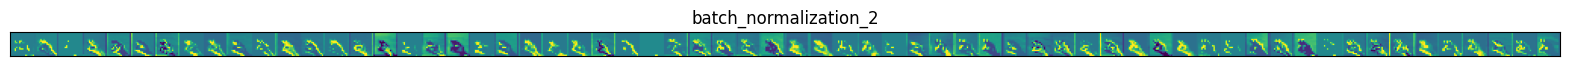

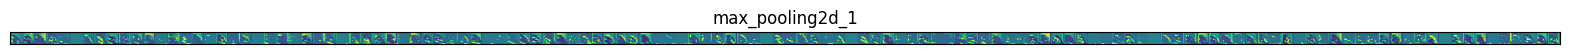

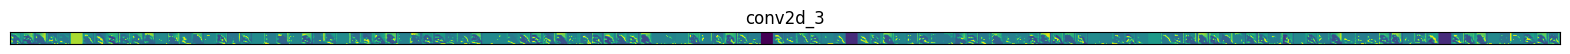

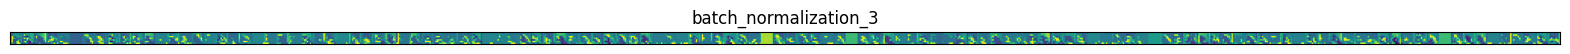

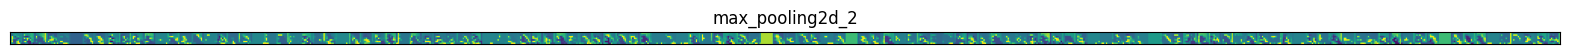

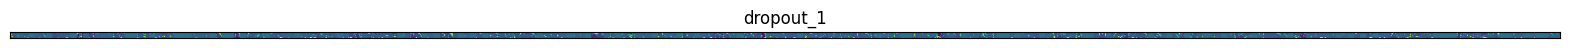

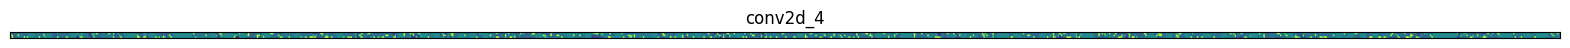

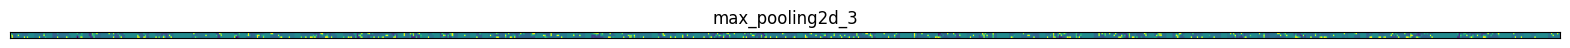

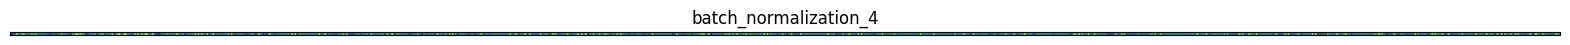

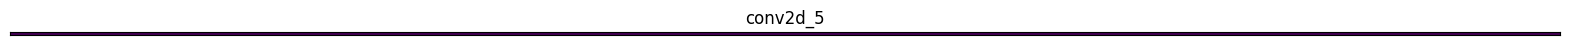

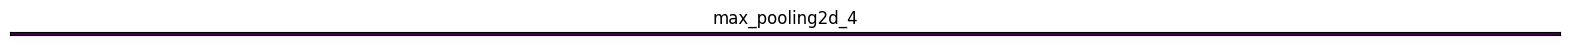

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the saved model
model = tf.keras.models.load_model('/content/gdrive/MyDrive/pre2_models/normalized_dataset_bestfit.h5')

# Define a new Model, Input=image, Output=intermediate representations for all layers in the model after the first
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)

# Load the input image
img_path = '/content/Capture2.JPG'  # Replace with the path to your image
img = load_img(img_path, target_size=(64, 64))

# Convert the image to an array of dimension (64, 64, 3)
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
x_min = np.min(x)
x_max = np.max(x)
x = (x - x_min) / (x_max - x_min)  # Apply min-max normalization

# Run the input image through the visualization network to obtain all intermediate representations
successive_feature_maps = visualization_model.predict(x)

# Retrieve the names of the layers
layer_names = [layer.name for layer in model.layers]

# Visualize the feature maps
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    print(feature_map.shape)
    if len(feature_map.shape) == 4:
        # Plot feature maps for the conv/maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # Number of features in the feature map
        size = feature_map.shape[1]  # Feature map shape (1, size, size, n_features)

        # Create a grid to tile the feature maps
        display_grid = np.zeros((size, size * n_features))

        # Postprocess the feature maps to be visually palatable
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            std = x.std()
            epsilon = 1e-8  # Small epsilon value to avoid division by zero
            x /= (std + epsilon)
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')

            # Tile each filter into the display grid
            display_grid[:, i * size: (i + 1) * size] = x

        # Display the grid
        scale = 20.0 / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.xticks([])  # Remove x-axis ticks
        plt.yticks([])  # Remove y-axis ticks
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()


1/1 [==============================] - 0s 87ms/step


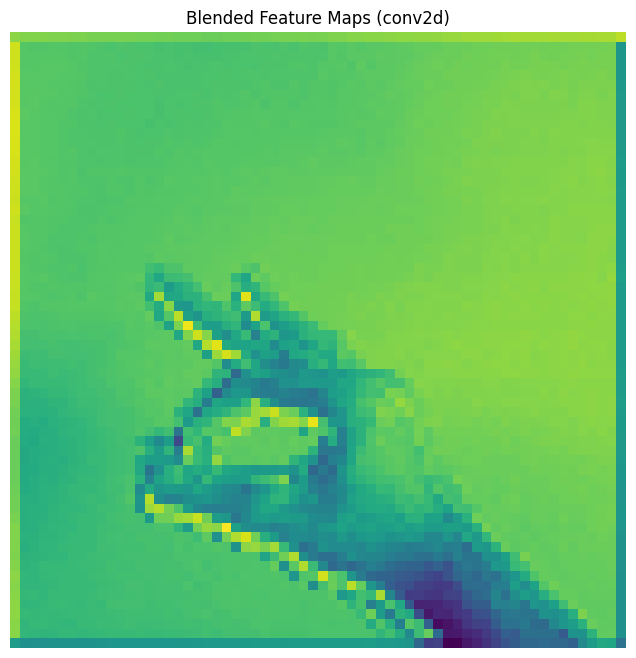

In [ ]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model('/content/gdrive/MyDrive/pre2_models/normalized_dataset_bestfit.h5')

# Select the layer for visualization
layer_name = 'conv2d'  # Replace with the desired layer name

# Create a model to get the feature maps
feature_extractor = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Load and preprocess the input image
image_path = '/content/Capture2.JPG'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
input_image = cv2.resize(image, (model.input_shape[1], model.input_shape[2]))
input_image = input_image[np.newaxis, ...]

# Get the feature maps for the input image
feature_maps = feature_extractor.predict(input_image)

# Create a row-wise blend of the feature maps
blended_feature_map = feature_maps[0].mean(axis=2)

# Visualize the blended feature map
plt.figure(figsize=(12, 8))
plt.imshow(blended_feature_map)
plt.axis('off')
plt.title(f'Blended Feature Maps ({layer_name})')
plt.show()

In [ ]:
# import tensorflow as tf
# import cv2
# import matplotlib.pyplot as plt

# # Load the saved model
# model = tf.keras.models.load_model('/content/gdrive/MyDrive/pre2_models/normalized_dataset_bestfit.h5')

# # Select the layer for visualization
# layer_name = ['conv2d', 'batch_normalization', 'conv2d_1', 'max_pooling2d', 'batch_normalization_1', 'dropout', 'conv2d_2', 'batch_normalization_2', 'max_pooling2d_1', 'conv2d_3', 'batch_normalization_3', 'max_pooling2d_2', 'dropout_1', 'conv2d_4', 'max_pooling2d_3', 'batch_normalization_4', 'conv2d_5', 'max_pooling2d_4', 'batch_normalization_5', 'flatten', 'dense', 'dropout_2', 'dense_1']  # Replace with the desired layer name

# for i in range(len(layer_name)):
#     # Create a model to get the feature maps
#     feature_extractor = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name[i]).output)

#     # Load and preprocess the input image
#     image_path = '/content/Capture2.JPG'
#     image = cv2.imread(image_path)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     input_image = cv2.resize(image, (model.input_shape[1], model.input_shape[2]))
#     input_image = input_image[np.newaxis, ...]

#     # Get the feature maps for the input image
#     feature_maps = feature_extractor.predict(input_image)

#     # Create a row-wise blend of the feature maps
#     blended_feature_map = feature_maps[0].mean(axis=2)

#     # Visualize the blended feature map
#     plt.figure(figsize=(12, 8))
#     plt.imshow(blended_feature_map)
#     plt.axis('off')
#     plt.title(f'Blended Feature Maps ({layer_name[i]})')
#     plt.show()

['conv2d', 'batch_normalization', 'conv2d_1', 'max_pooling2d', 'batch_normalization_1', 'dropout', 'conv2d_2', 'batch_normalization_2', 'max_pooling2d_1', 'conv2d_3', 'batch_normalization_3', 'max_pooling2d_2', 'dropout_1', 'conv2d_4', 'max_pooling2d_3', 'batch_normalization_4', 'conv2d_5', 'max_pooling2d_4', 'batch_normalization_5', 'flatten', 'dense', 'dropout_2', 'dense_1'].

## Classification Report

In [ ]:
import numpy as np
from sklearn.metrics import classification_report
import tensorflow as tf
model = tf.keras.models.load_model('/content/gdrive/MyDrive/pre2_models/10normalized_dataset_bestfit.h5')
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels_one_hot, axis=1)
report = classification_report(true_labels, predicted_labels)
print(report)


242/242 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       202
           1       0.98      0.98      0.98       200
           2       0.99      0.99      0.99       200
           3       0.93      0.90      0.92       216
           4       0.99      0.99      0.99       165
           5       0.98      1.00      0.99       206
           6       0.98      0.99      0.99       201
           7       0.97      0.99      0.98       204
           8       0.98      0.98      0.98       214
           9       0.98      0.98      0.98       191
          10       0.99      0.99      0.99       220
          11       0.99      0.96      0.98       196
          12       0.99      0.98      0.99       178
          13       0.99      0.96      0.97       194
          14       0.98      0.97      0.98       200
          15       0.99      0.97      0.98       180
          16       0.99   

In [ ]:
import numpy as np
from sklearn.metrics import classification_report
import tensorflow as tf
model = tf.keras.models.load_model('/content/gdrive/MyDrive/pre2_models/10normalized_dataset_bestfit.h5')
predictions = model.predict(val_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(val_labels_one_hot, axis=1)
report = classification_report(true_labels, predicted_labels)
print(report)


48/48 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        40
           1       0.98      1.00      0.99        40
           2       0.95      0.97      0.96        40
           3       0.82      0.57      0.68        40
           4       0.89      0.82      0.86        40
           5       0.98      1.00      0.99        40
           6       0.97      0.97      0.97        40
           7       0.93      0.97      0.95        40
           8       0.93      0.97      0.95        40
           9       1.00      0.93      0.96        40
          10       0.95      0.97      0.96        40
          11       0.93      0.95      0.94        40
          12       0.94      0.80      0.86        40
          13       0.88      0.90      0.89        40
          14       0.95      0.97      0.96        40
          15       0.90      0.93      0.91        40
          16       0.95     